In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
from fastai import *
from fastai.vision import *
import os
from glob import glob
from utils.databunch import *
from utils.metrics import acc_cityscapes

In [5]:
base_dir = "data/minicity"

## Sanitize data

In [9]:

images = glob(base_dir + '/leftImg8bit/*/*.png')

for img in images:
    new = img.replace("_leftImg8bit", "")
    os.rename(img,new)

gt = glob(base_dir + '/gtFine/*/*.png')

for img in gt:
    new = img.replace("_gtFine_labelIds", "")
    os.rename(img,new)


In [11]:
data = get_databunch(base_dir)

In [12]:
data.c

35

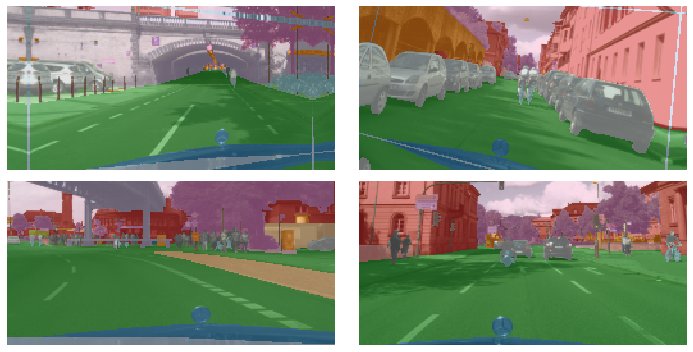

In [13]:
data.show_batch(2, figsize=(10,5))

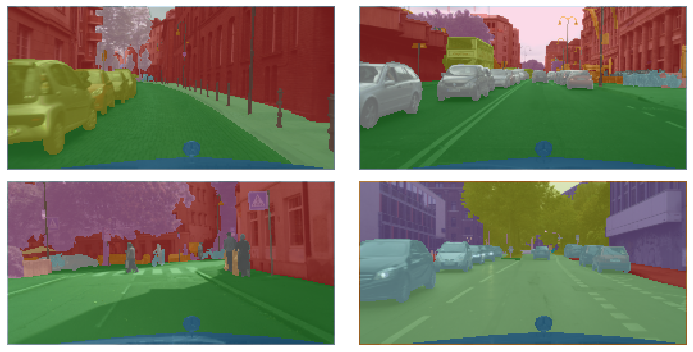

In [14]:
data.show_batch(2, figsize=(10,5), ds_type=DatasetType.Valid)

In [16]:
metrics=acc_cityscapes


## Prepare UNet model

In [23]:
learn = unet_learner(data, models.resnet34,metrics=metrics,wd=1e-2, pretrained=False)

In [24]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


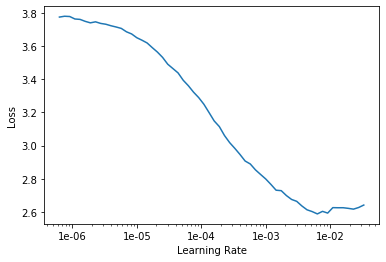

In [25]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
lr = 3e-4
learn.fit_one_cycle(30, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_cityscapes,time


In [ ]:
learn.save('semantic-final-1')

## Results

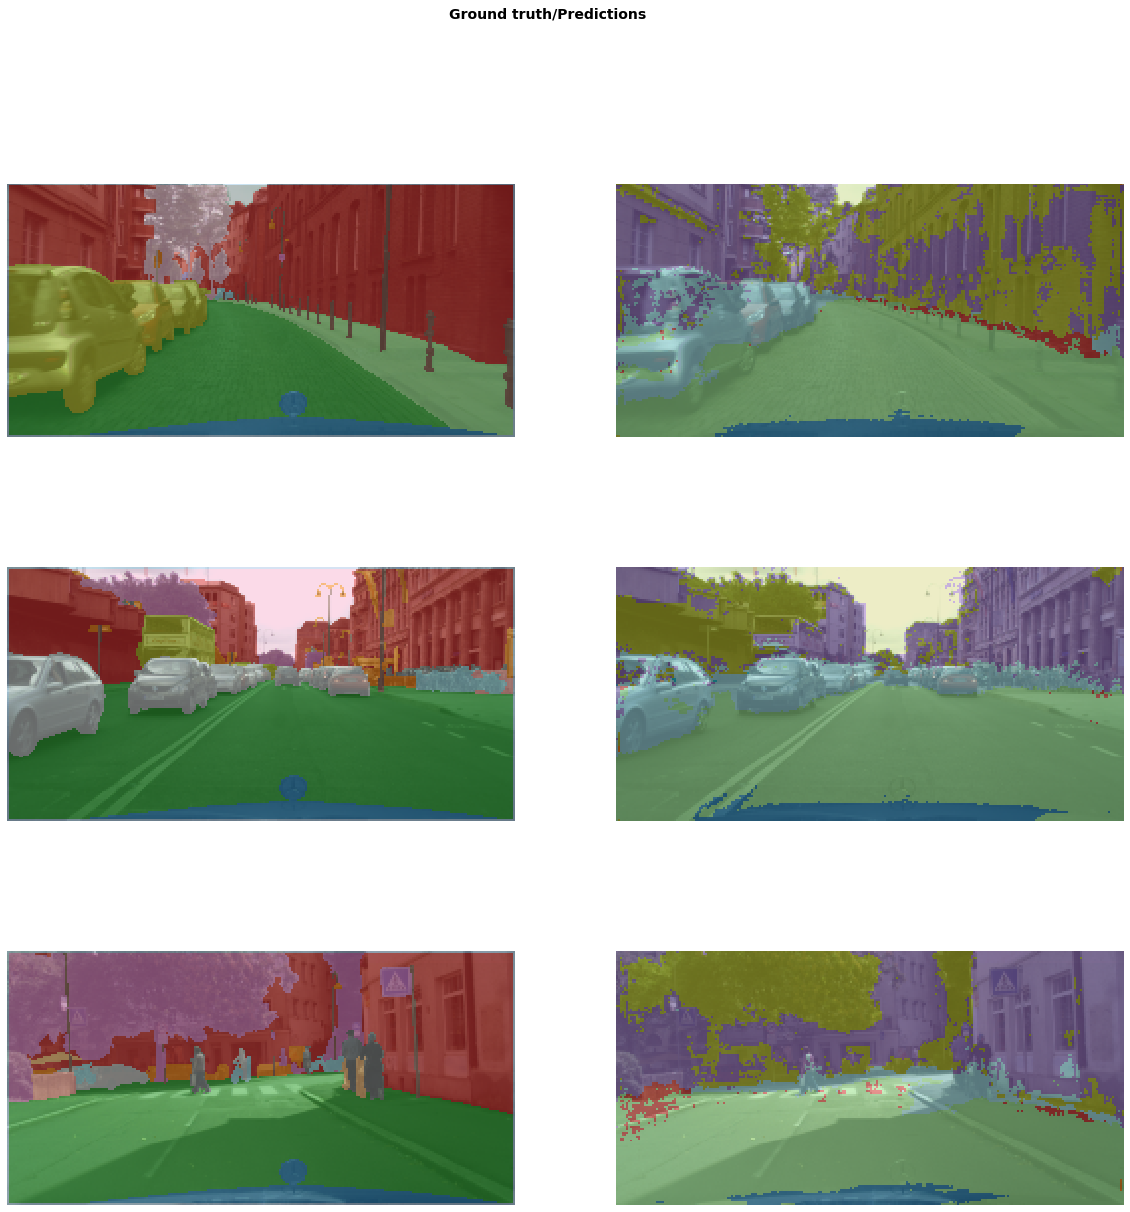

In [22]:
learn.show_results(rows=3, figsize=(20,20))